In [162]:
import pandas as pd
import numpy as np

In [163]:
df = pd.read_csv("datasets\insurance.csv")
# возраст: возраст основного получателя
# пол: страховой агент пол, женщина, мужчина
# ИМТ: индекс массы тела, позволяющий получить представление о телосложении, относительно высоком или низком весе по отношению к росту, объективный индекс массы тела (кг / м2) с использованием отношения роста к весу, в идеале от 18,5 до 24,9
# дети: количество детей, охваченных медицинской страховкой / Количество иждивенцев
# курильщик
# регион: район проживания получателя в США, северо-восток, юго-восток, юго-запад, северо-запад.
# расходы: Индивидуальные медицинские расходы, оплачиваемые медицинской страховкой
# Требуется прогнозировать колонку charges.

'''
гипотезы

чем меньше возраст, тем больше траты на медобслуживание (люди получают права и начинают чаще попадать в аварии)
чем больше вес, тем больше траты (более вероятны проблемы со здоровьем, если коэффициент выходит за 25)
чем больше детей, тем больше траты (выше вероятность что мелкенький попадёт в неприятность - сломает ногу или под машину)
'''

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='age'>

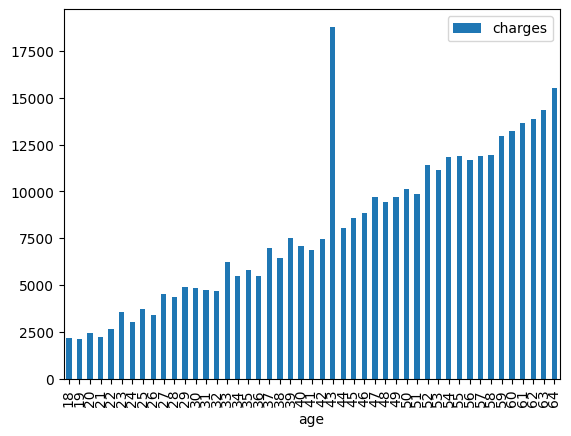

In [164]:
df.groupby(["age"]).agg({"charges": "median", "age": "min"}).plot(x="age", kind="bar")
#в возрасте 43 - выбосы, надо почистить

In [170]:
age43 = df[df["age"]==43]["charges"]

vibrosi = []
for index in df[df["age"] == 43].index:
    if df.iloc[index]["charges"] > np.percentile(age43, 75):
        vibrosi.append(index)

df = df.drop(vibrosi)  
#почистили

<Axes: xlabel='sex'>

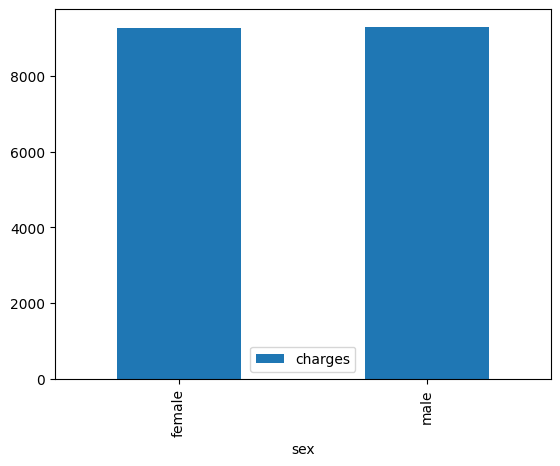

In [171]:
df.groupby(["sex"]).agg({"charges": "median", "sex": "min"}).plot(x="sex", kind="bar")


<Axes: xlabel='bmi'>

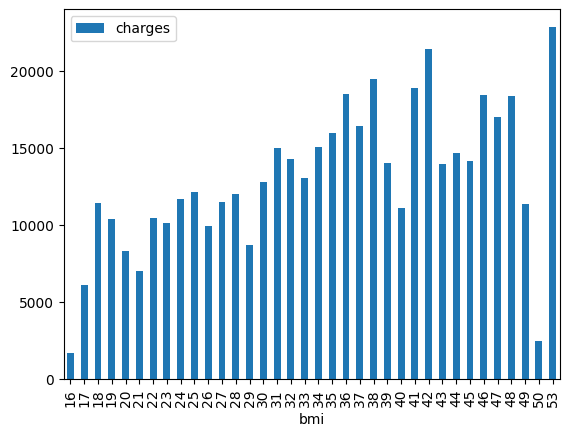

In [172]:
df["bmi"] = df["bmi"].apply(lambda x: round(x))
df.groupby(df["bmi"]).agg({"charges": "mean", "bmi": "max"}).plot(x="bmi", kind="bar")
#наблюдается тренд: чем больше bmi, тем больше страховка (за исключением выбросов)

<Axes: xlabel='children'>

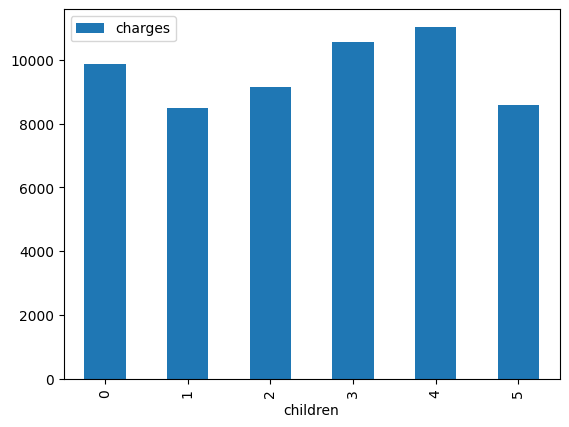

In [173]:
df.groupby(["children"]).agg({"charges": "median", "children": "min"}).plot(x="children", kind="bar")
#непонятно, есть ли зависимость

<Axes: xlabel='smoker'>

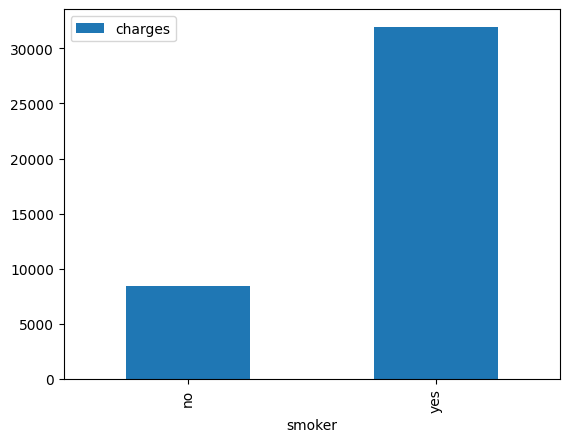

In [174]:
df.groupby(["smoker"]).agg({"charges": "mean", "smoker": "min"}).plot(x="smoker", kind="bar")
#тут всё очевидно

<Axes: xlabel='region'>

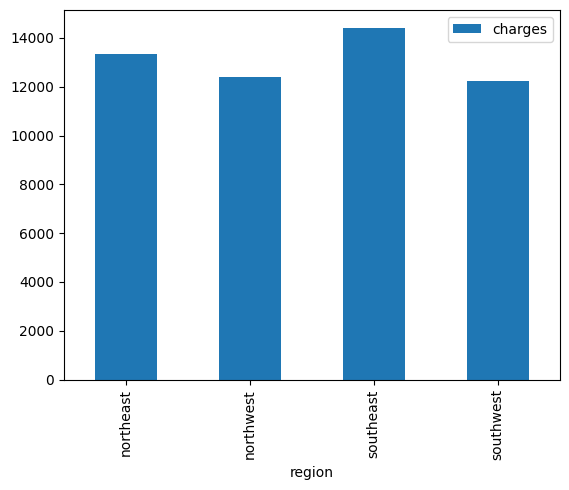

In [175]:
df.groupby(["region"]).agg({"charges": "mean", "region": "min"}).plot(x="region", kind="bar")

In [176]:
data = df[["age", "sex", "bmi", "children", "smoker", "region", "charges"]]

data_x = data.drop(["charges"], axis = 1)
data_y = data.charges

In [177]:
from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import make_column_transformer

ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
ohetranseform = ohe.fit_transform(data_x[["sex","smoker","region"]]) #we have to put in a dataframe with [[]]
data_x = pd.concat([data_x, ohetranseform], axis=1).drop(columns = ["sex","smoker","region"])

In [178]:
from sklearn.model_selection import train_test_split

test_x, train_x, test_y, train_y = train_test_split(data_x, data_y, train_size=0.2, random_state=5)

In [179]:
from sklearn.linear_model import LinearRegression

# GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values
    # for a given model. 

ln = LinearRegression()
ln.fit(train_x, train_y)


LinearRegression()

In [180]:
pred = ln.predict(test_x)
ln.score(test_x, test_y)

0.7919744421122233